# ANALISE EXPLORATORIA - GRAFICOS, VISUALIZAÇÃO E DASHBOARD - FAÇA VOCÊ MESMO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#carregamento da base de dados
df_dados = pd.read_csv('../data/dados.csv', sep=';', encoding='latin')
print(f'linhas: {df_dados.shape[0]} / colunas: {df_dados.shape[1]}')
df_dados.head()

linhas: 187 / colunas: 4


,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


### Divisão do tipo de dados
- Categóricos:
    - MUNICIPIO
- Numéricos:
    - CODIGO
    - PIB 
    - VALOREMPENHO

In [4]:
#verificação de nulos
df_dados.isna().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

como visto, não há valores nulos

In [22]:
df_dados[df_dados['CODIGO'].duplicated(keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [24]:
df_dados = df_dados.drop_duplicates(subset='CODIGO', keep='first')

In [25]:
df_dados[df_dados['CODIGO'].duplicated(keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


Text(0.5, 1.0, 'PIB')

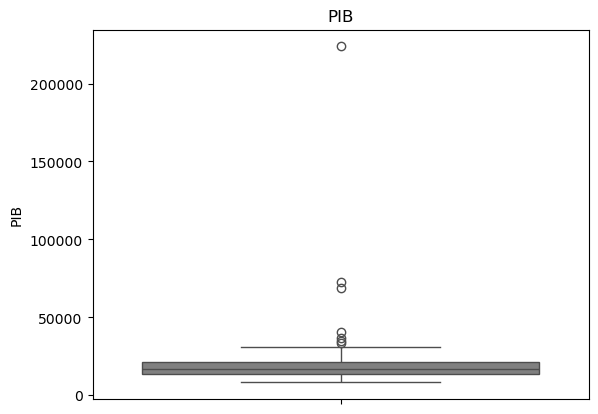

In [26]:
#boxplot dos dados
sns.boxplot(data=df_dados['PIB'], color='gray').set_title('PIB')

Text(0.5, 1.0, 'VALOREMPENHO')

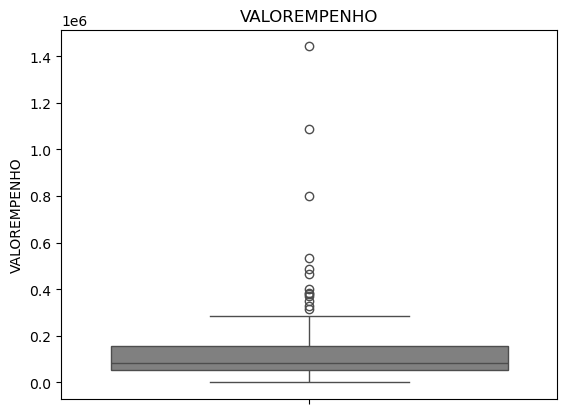

In [27]:
sns.boxplot(data=df_dados['VALOREMPENHO'], color='gray').set_title('VALOREMPENHO')

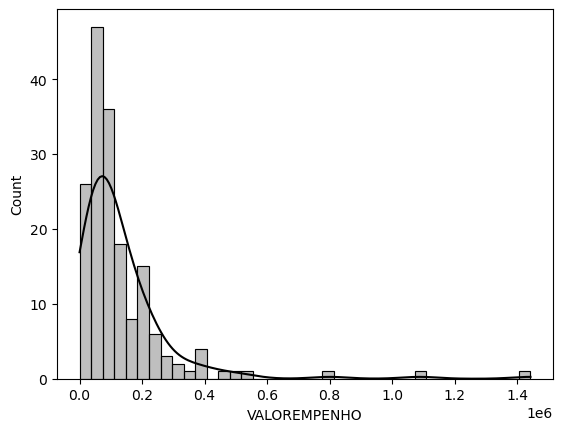

In [33]:
sns.histplot(data=df_dados['VALOREMPENHO'], kde=True, color='gray').lines[0].set_color('black')

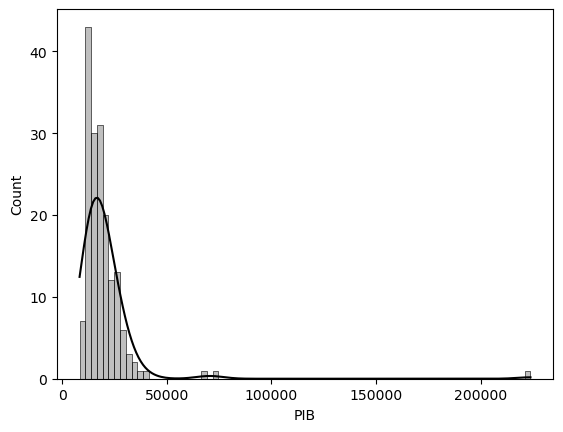

In [34]:
sns.histplot(data=df_dados['PIB'], color='gray', kde=True).lines[0].set_color('black')

<Axes: xlabel='PIB', ylabel='VALOREMPENHO'>

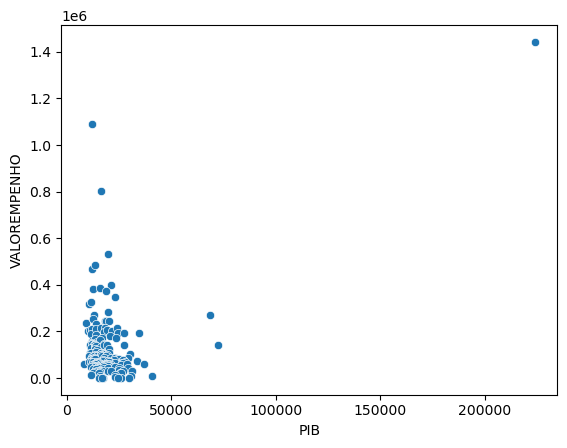

In [36]:
sns.scatterplot(x='PIB', y='VALOREMPENHO', data=df_dados)

In [40]:
matriz = df_dados[['PIB','VALOREMPENHO']].corr()
matriz

,PIB,VALOREMPENHO
PIB,1.000000,0.498549
VALOREMPENHO,0.498549,1.000000


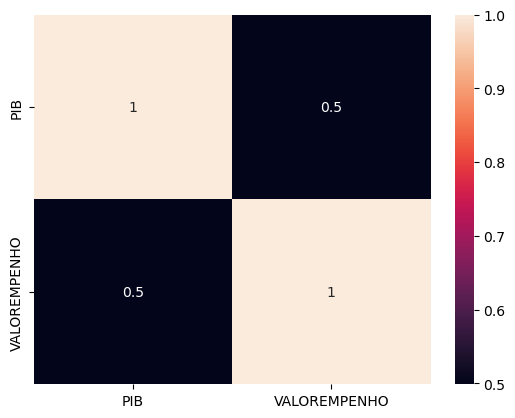

In [41]:
sns.heatmap(matriz, annot=True)
plt.show()